In [46]:
import time 

from IPython.core.display import display
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
sns.set(font='Osaka')
import pandas as pd

In [51]:
t0 = time.time()
data_dir = '../data/'
file = 'df_item_transaction.csv'
df_item_transaction = pd.read_csv(data_dir + file).drop('Unnamed: 0', axis=1)
print('Load in ', time.time() - t0)

Load in  1.0304169654846191


In [52]:
df_item_transaction.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00


In [53]:
df_item_transaction['InvoiceDate'] = \
pd.to_datetime(df_item_transaction['InvoiceDate']) 

In [54]:
df_uk = \
df_item_transaction[df_item_transaction['Country'] == 'United Kingdom']\

In [68]:
# Time series analysis

# Sales
df_uk_ts = \
pd.DataFrame(df_uk.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['Sales'].sum())

# Quantity
df_uk_ts['Quantity'] = \
pd.DataFrame(df_uk.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['Quantity'].sum())

# #ofTransactions
df_uk_ts['#ofTransactions'] = \
pd.DataFrame(df_uk.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['InvoiceNo'].nunique())

# Sales / Quantity
df_uk_ts['Sales/Quantity'] = df_uk_ts['Sales'] / df_uk_ts['Quantity']

# Quantity / Transaction
df_uk_ts['Quantity/Transaction'] = df_uk_ts['Quantity'] / df_uk_ts['#ofTransactions']

# Monthly # of Customers
df_uk_ts['#ofCustomers'] = df_uk.groupby(pd.Grouper(key='InvoiceDate', freq='MS'))['CustomerID'].nunique()

# Transaction / Customer
df_uk_ts['Transaction/Customer'] = df_uk_ts['#ofTransactions'] / df_uk_ts['#ofCustomers']

display(df_uk_ts.head())

,Sales,Quantity,#ofTransactions,Sales/Quantity,Quantity/Transaction,#ofCustomers,Transaction/Customer
InvoiceDate,,,,,,,
2010-12-01,707513.750,313902,1441,2.253932,217.836225,815,1.768098
2011-01-01,547241.830,315614,968,1.733896,326.047521,645,1.500775
2011-02-01,419000.620,230124,990,1.820760,232.448485,678,1.460177
2011-03-01,572881.460,304831,1302,1.879341,234.125192,879,1.481229
2011-04-01,466268.821,276132,1150,1.688572,240.114783,784,1.466837


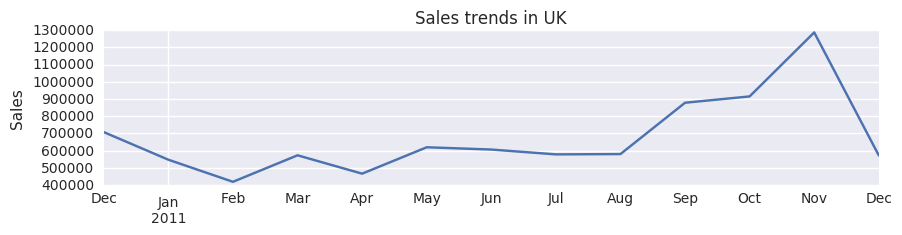

In [56]:
# Sales

figsize = (10, 2)
df_uk_ts['Sales'].plot(figsize=figsize)
plt.xlabel('')
plt.ylabel('Sales')
plt.title('Sales trends in UK')
plt.show()

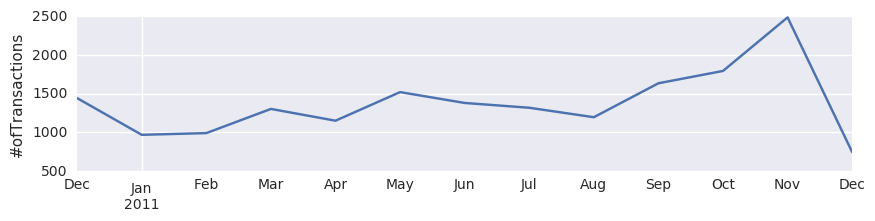

In [57]:
# Transactions

figsize = (10, 2)
y = '#ofTransactions'
df_uk_ts[y].plot(figsize=figsize)
plt.xlabel('')
plt.ylabel(y)
#plt.title('Sales trends in UK')
plt.show()

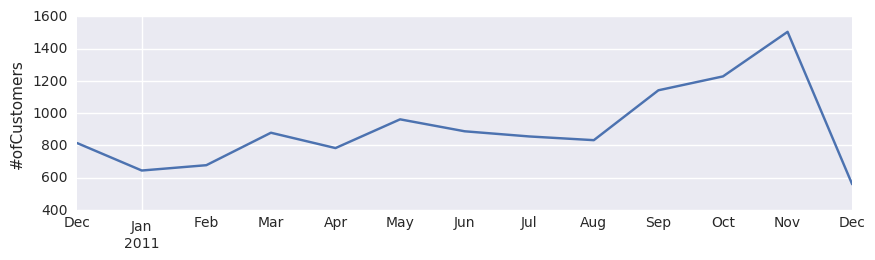

In [69]:
# Customers
figsize = (10, 2.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=figsize)

y = '#ofCustomers'
df_uk_ts[y].plot(figsize=figsize)
ax1.set_xlabel('')
ax1.set_ylabel(y)
plt.show()

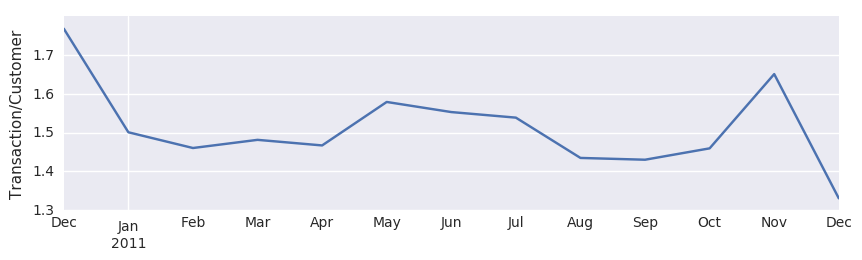

In [72]:
# Transaction / Customer
figsize = (10, 2.5)
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=figsize)

y = 'Transaction/Customer'
df_uk_ts[y].plot(figsize=figsize)
ax1.set_xlabel('')
ax1.set_ylabel(y)
plt.show()

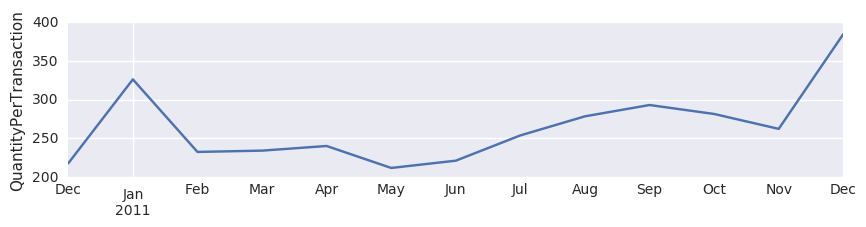

In [58]:
figsize = (10, 2)
y = 'Quantity/Transaction'
df_uk_ts[y].plot(figsize=figsize)
plt.xlabel('')
plt.ylabel(y)
#plt.title('Sales trends in UK')
plt.show()

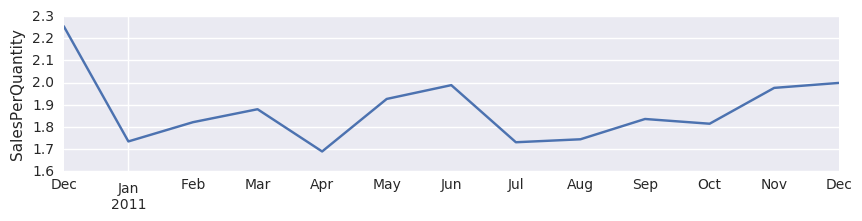

In [59]:
figsize = (10, 2)
y = 'Sales/Quantity'
df_uk_ts[y].plot(figsize=figsize)
plt.xlabel('')
plt.ylabel(y)
#plt.title('Sales trends in UK')
plt.show()

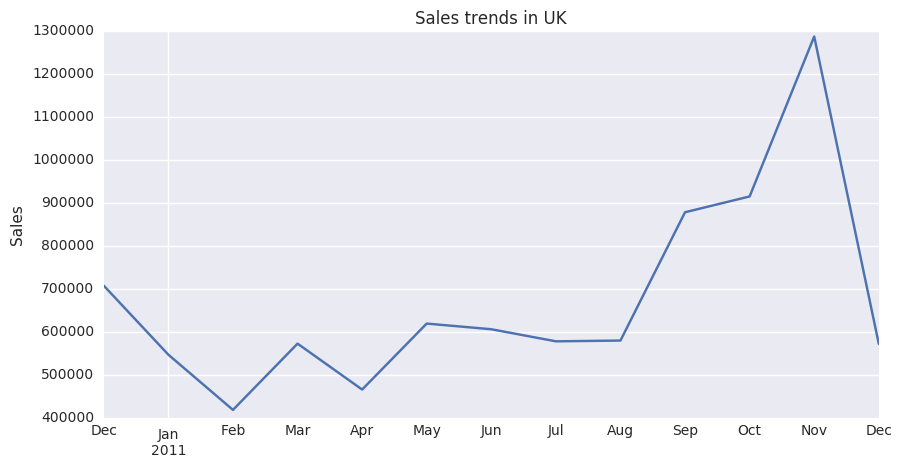

In [39]:
# 資料用のプロット

figsize = (10, 5)
df_uk_ts['Sales'].plot(figsize=figsize)
plt.xlabel('')
plt.ylabel('Sales')
plt.title('Sales trends in UK')
plt.show()

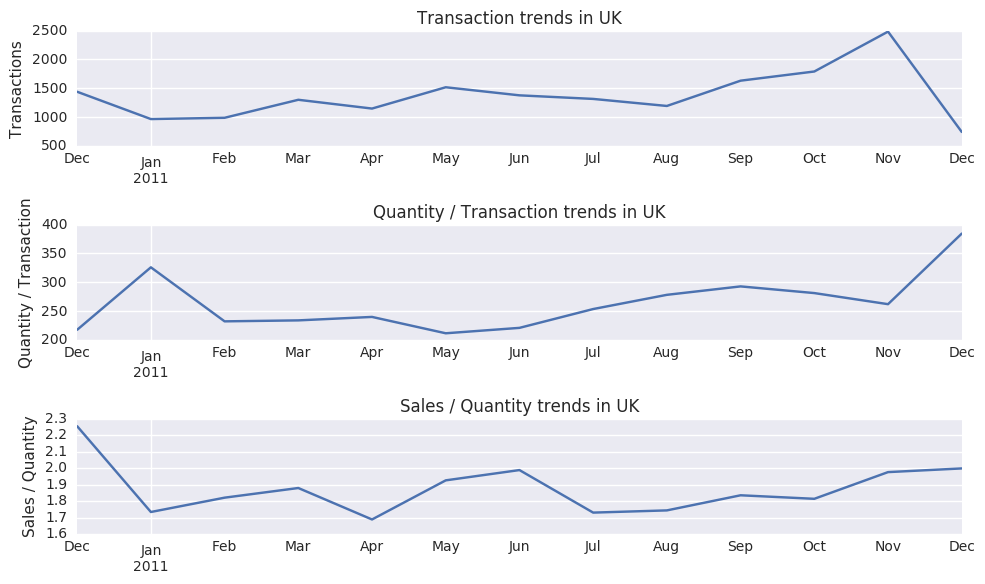

In [45]:
# 資料用のプロット

figsize = (10, 6)
fig, (ax1, ax3, ax2) = plt.subplots(nrows=3, ncols=1, figsize=figsize)

df_uk_ts['#ofTransactions'].plot(ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('Transactions')
ax1.set_title('Transaction trends in UK')

y = 'QuantityPerTransaction'
df_uk_ts[y].plot(ax=ax3)
ax3.set_xlabel('')
ax3.set_ylabel('Quantity / Transaction')
ax3.set_title('Quantity / Transaction trends in UK')

y = 'SalesPerQuantity'
df_uk_ts[y].plot(ax=ax2)
ax2.set_xlabel('')
ax2.set_ylabel('Sales / Quantity')
ax2.set_title('Sales / Quantity trends in UK')

plt.tight_layout()
plt.show()